In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import networkx as nx

## Read stations and segments

In [54]:
segments = pd.read_csv("fare scenarios/rail_net_segment.csv",
                       encoding='windows-1252')

station_codes = pd.read_csv("fare scenarios/rail_net_station.csv",
                       encoding='windows-1252')

In [77]:
station_codes.head()

,ID,NAME_RR,NAME_OD,TABLEAU_91_X,TABLEAU_91_Y,TABLEAU_86_X,TABLEAU_86_Y,GTFS_STOP_ID,METRO2025,PARKING_SPACES,WIRE_DIAG_X,WIRE_DIAG_Y,PRIMARY_NAME,DIAMOND,PARKING_RATE,MCAT_ID,NAME_WALKSHED,NAME_RAIL_SCHED,MCAT_LOC_ID,WEBSITE_ID,DAILY_PARKING_SPACES,METERED_PARKING_SPACES,TOTAL_PARKING_SPACES,YARD_ID,NAME_PARK,NAME_GTFS,GEOID_BG
0,MSTN_001,Anacostia,Anacostia,56.829967,-54.155616,56.829967,-54.155616,6751.0,0,808.0,54.814820,-45.330791,Anacostia,1.0,4.6,F06,ANACOSTIA,Annacostia,12.0,85.0,808.0,340.0,1148.0,F99,Anacostia Garage,ANACOSTIA METRO STATION,1.100101e+11
1,MSTN_002,Archives,Archives-Navy Memorial,21.658339,-3.676570,21.658339,-3.676570,7477.0,0,NaN,27.454301,-3.826275,Archives,1.0,NaN,F02,ARCHIVES-NAVY MEMORIAL-PENN QUARTER,Archives,22.0,81.0,NaN,NaN,NaN,E99,NaN,ARCHIVES METRO STATION,1.100101e+11
2,MSTN_003,Benning Road,Benning Road,94.085106,-12.235929,94.085106,-9.896657,4613.0,0,NaN,87.276452,-7.536176,Benning Road,NaN,NaN,G01,BENNING ROAD,Benning Road,87.0,90.0,NaN,NaN,NaN,G98,NaN,BENNING RD METRO STATION,1.100101e+11
3,MSTN_004,Brookland-CUA,Brookland,49.600270,41.645510,49.600270,41.645510,4710.0,0,NaN,46.235674,43.706829,Brookland-CUA,1.0,NaN,B05,BROOKLAND-CUA,Brookland - CUA,41.0,27.0,NaN,25.0,25.0,B98,NaN,BROOKLAND-CUA METRO,1.100101e+11
4,MSTN_005,Capitol South,Capitol South,43.458210,-20.191353,43.458210,-20.191353,12900.0,0,NaN,44.844461,-14.724109,Capitol South,1.0,NaN,D05,CAPITOL SOUTH,Capitol South,84.0,59.0,NaN,NaN,NaN,D99,NaN,CAPITOL SOUTH METRO STATION,1.100101e+11


In [78]:
stations_zoned = pd.read_csv("fare scenarios/stations_zoned.csv",
                       encoding='windows-1252')

In [79]:
stations_zoned.head()

,Unnamed: 0,ORIGIN_MSTN_ID,ORIGIN_NAME,ORIGIN_X_COORD,ORIGIN_Y_COORD,DEST_MSTN_ID,DEST_NAME,DEST_X_COORD,DEST_Y_COORD,TRACK_MI,DIST_MI,COMP_OLD_MI,COMP_MI,zone_a,zone_b,zone_c,zone_d
0,0,MSTN_001,ANACOSTIA,-76.995557,38.863279,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,3.51,2.831512,3.16,3.170756,1,1,2,2
1,1,MSTN_002,ARCHIVES-NAVY MEMORIAL-PENN QUARTER,-77.021906,38.893217,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,0.36,0.358857,0.36,0.359429,1,1,1,1
2,2,MSTN_003,BENNING ROAD,-76.938617,38.891061,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,6.21,4.565961,5.36,5.387981,1,2,2,2
3,3,MSTN_004,BROOKLAND-CUA,-76.994544,38.933118,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,3.63,2.839606,3.24,3.234803,1,1,2,2
4,4,MSTN_005,CAPITOL SOUTH,-77.005213,38.885065,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,1.83,1.319620,1.56,1.574810,1,1,1,1


In [80]:
stations = stations_zoned.merge(station_codes[["ID", "MCAT_ID"]], 
                                      left_on="ORIGIN_MSTN_ID", 
                                      right_on="ID")

In [81]:
stations.head()

,Unnamed: 0,ORIGIN_MSTN_ID,ORIGIN_NAME,ORIGIN_X_COORD,ORIGIN_Y_COORD,DEST_MSTN_ID,DEST_NAME,DEST_X_COORD,DEST_Y_COORD,TRACK_MI,DIST_MI,COMP_OLD_MI,COMP_MI,zone_a,zone_b,zone_c,zone_d,ID,MCAT_ID
0,0,MSTN_001,ANACOSTIA,-76.995557,38.863279,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,3.51,2.831512,3.16,3.170756,1,1,2,2,MSTN_001,F06
1,1,MSTN_002,ARCHIVES-NAVY MEMORIAL-PENN QUARTER,-77.021906,38.893217,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,0.36,0.358857,0.36,0.359429,1,1,1,1,MSTN_002,F02
2,2,MSTN_003,BENNING ROAD,-76.938617,38.891061,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,6.21,4.565961,5.36,5.387981,1,2,2,2,MSTN_003,G01
3,3,MSTN_004,BROOKLAND-CUA,-76.994544,38.933118,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,3.63,2.839606,3.24,3.234803,1,1,2,2,MSTN_004,B05
4,4,MSTN_005,CAPITOL SOUTH,-77.005213,38.885065,MSTN_019,GALLERY PLACE-CHINATOWN,-77.0228,38.898372,1.83,1.319620,1.56,1.574810,1,1,1,1,MSTN_005,D05


In [7]:
segments

,ID,LINE,LENGTH_MILES,TRAVEL_TIME,STOP_1,STOP_2,SEGMENT_CODE,TRAVEL_TIME_FY18
0,1,A,0.787036,2,A01,A02,A01-A02,3.0
1,2,B,0.285137,2,A01,B01,A01-B01,2.0
2,3,A,0.512251,2,A02,A03,A02-A03,3.0
3,4,A,1.193718,2,A03,A04,A03-A04,2.0
4,5,A,0.708294,3,A04,A05,A04-A05,2.0
...,...,...,...,...,...,...,...,...
94,95,N,1.355716,0,N07,N08,N07-N08,NaN
95,96,N,1.687890,0,N08,N09,N08-N09,NaN
96,97,N,2.114519,0,N09,N10,N09-N10,NaN
97,98,N,2.857750,0,N10,N11,N10-N11,NaN


Transfer stations are labelled with two different IDs depending on line they serve. Let's label them with a joint ID. Specifically, this applies to the following rows:

In [64]:
stations[stations.MCAT_ID.str.len() > 3]

,Unnamed: 0,ORIGIN_MSTN_ID,ORIGIN_NAME,ORIGIN_X_COORD,ORIGIN_Y_COORD,DEST_MSTN_ID,DEST_NAME,DEST_X_COORD,DEST_Y_COORD,TRACK_MI,DIST_MI,COMP_OLD_MI,COMP_MI,zone_a,zone_b,zone_c,zone_d,ID,MCAT_ID
16,16,MSTN_017,FORT TOTTEN,-77.002294,38.951778,MSTN_019,GALLERY PLACE-CHINATOWN,-77.022800,38.898372,4.90,3.846175,4.36,4.373087,1,1,2,2,MSTN_017,B06/E06
18,18,MSTN_019,GALLERY PLACE-CHINATOWN,-77.022800,38.898372,MSTN_019,GALLERY PLACE-CHINATOWN,-77.022800,38.898372,0.10,0.000000,0.05,0.050000,1,1,1,1,MSTN_019,B01/F01
21,21,MSTN_022,L'ENFANT PLAZA,-77.021910,38.884886,MSTN_019,GALLERY PLACE-CHINATOWN,-77.022800,38.898372,0.91,0.931520,0.91,0.920760,1,1,1,1,MSTN_022,D03/F03
23,23,MSTN_024,METRO CENTER,-77.028086,38.898313,MSTN_024,METRO CENTER,-77.028086,38.898313,0.10,0.000000,0.05,0.050000,1,1,1,1,MSTN_024,A01/C01


In [65]:
mcat_dict = {}
# get list of stations with two MCAT IDs
joint_mcats = list(stations[stations.MCAT_ID.str.len() > 3].MCAT_ID)
# populate dict
for joint_id in transfer_mcats:
    for single_id in joint_id.split("/"):
        mcat_dict[single_id] = joint_id
        
mcat_dict

{'B06': 'B06/E06',
 'E06': 'B06/E06',
 'B01': 'B01/F01',
 'F01': 'B01/F01',
 'D03': 'D03/F03',
 'F03': 'D03/F03',
 'A01': 'A01/C01',
 'C01': 'A01/C01'}

In [66]:
# replace single MCAT ID with joint ID for each transfer station
# in both STOP_1 and STOP2 columns
for field in ["STOP_1", "STOP_2"]:
    for mcat, join_mcat in mcat_dict.items():
        segments.loc[segments[field] == mcat, field] = join_mcat

In [67]:
segments

,ID,LINE,LENGTH_MILES,TRAVEL_TIME,STOP_1,STOP_2,SEGMENT_CODE,TRAVEL_TIME_FY18
0,1,A,0.787036,2,A01/C01,A02,A01-A02,3.0
1,2,B,0.285137,2,A01/C01,B01/F01,A01-B01,2.0
2,3,A,0.512251,2,A02,A03,A02-A03,3.0
3,4,A,1.193718,2,A03,A04,A03-A04,2.0
4,5,A,0.708294,3,A04,A05,A04-A05,2.0
...,...,...,...,...,...,...,...,...
94,95,N,1.355716,0,N07,N08,N07-N08,NaN
95,96,N,1.687890,0,N08,N09,N08-N09,NaN
96,97,N,2.114519,0,N09,N10,N09-N10,NaN
97,98,N,2.857750,0,N10,N11,N10-N11,NaN


Looks great!

## Create graph

In [68]:
# create edges as a list of tuples, 
# adding segment length as edge weight
edges = [(row.STOP_1, row.STOP_2, {'weight': row.LENGTH_MILES}) 
            for index, row in segments.iterrows()]

In [69]:
G = nx.Graph(edges)

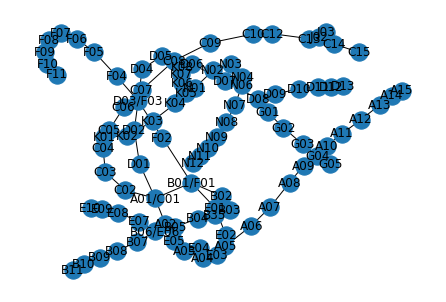

In [70]:
nx.draw(G, with_labels=True)

Let's draw the graph with the correct coordinates and coloured according to station zones.

In [94]:
# add coordinates and zone for each node
for index, row in stations.iterrows():
    G.nodes[row.MCAT_ID]['pos'] = (row.ORIGIN_X_COORD, 
                                   row.ORIGIN_Y_COORD)
    G.nodes[row.MCAT_ID]['zone'] = row.zone_d

In [96]:
zone_colors = [G.nodes[node]['zone'] for node in G.nodes]

In [ ]:
pos = nx.get_node_attributes(G,'pos')

In [117]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}
pos_labels = nudge(pos, 0, 0.008)

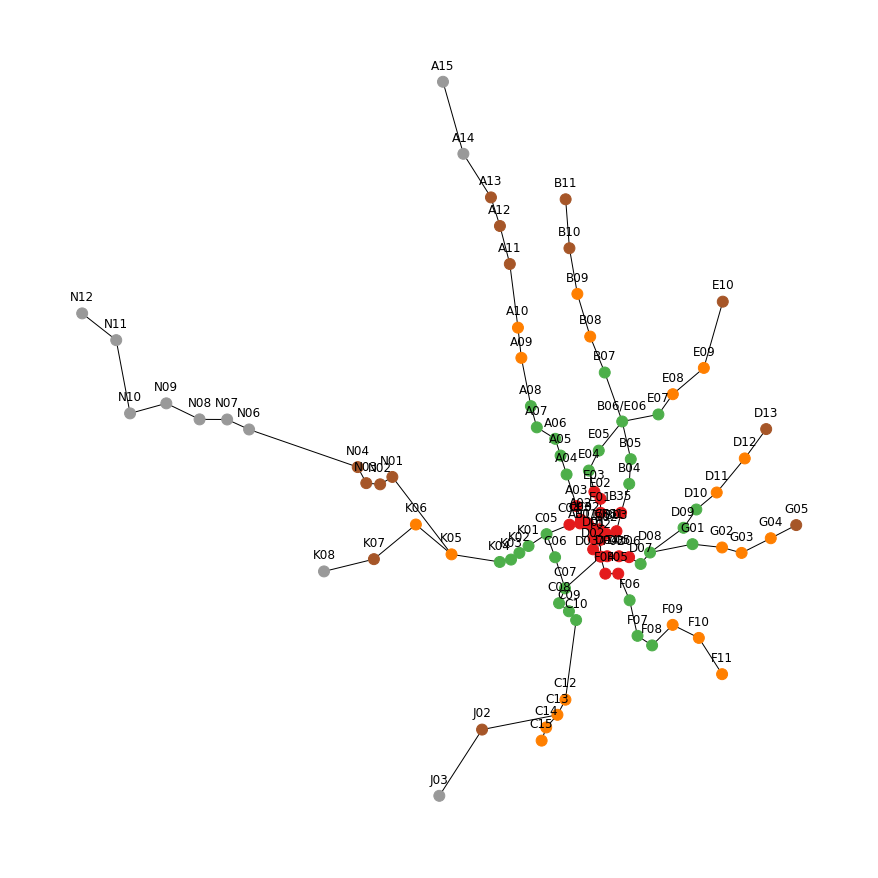

In [124]:
plt.figure(figsize=(12,12)) 
nx.draw(G, 
        pos, 
        node_size=120, 
        # with_labels=True, 
        # verticalalignment='bottom',
        node_color=zone_colors, 
        cmap="Set1")

nx.draw_networkx_labels(G, pos=pos_labels)
plt.show()

## Shortest paths for each OD pair

Read OD table and join with MCAT IDs

In [154]:
station_pairs = pd.read_csv("fare scenarios/rail_od_distances_cleaned.csv",
                       encoding='windows-1252')

In [155]:
station_pairs

,Unnamed: 0,ORIGIN_MSTN_ID,ORIGIN_NAME,ORIGIN_X_COORD,ORIGIN_Y_COORD,DEST_MSTN_ID,DEST_NAME,DEST_X_COORD,DEST_Y_COORD,TRACK_MI,DIST_MI,COMP_OLD_MI,COMP_MI
0,0,MSTN_042,ROCKVILLE,-77.146191,39.084264,MSTN_056,NEW CARROLLTON,-76.871868,38.948020,26.59,17.500398,22.04,22.045199
1,1,MSTN_014,FEDERAL CENTER SW,-77.015935,38.885068,MSTN_012,FARRAGUT NORTH,-77.039666,38.903139,2.29,1.786179,2.04,2.038090
2,2,MSTN_065,ARLINGTON CEMETERY,-77.063097,38.884581,MSTN_061,COURT HOUSE,-77.087141,38.890145,2.03,1.351897,1.69,1.690949
3,3,MSTN_038,VAN NESS-UDC,-77.062951,38.943203,MSTN_059,WEST FALLS CHURCH-VT/UVA,-77.189219,38.900781,13.71,7.406687,10.56,10.558343
4,4,MSTN_027,NAVY YARD-BALLPARK,-77.005875,38.876465,MSTN_048,FOREST GLEN,-77.042925,39.014938,12.24,9.758329,11.00,10.999164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9404,9404,MSTN_044,GLENMONT,-77.053546,39.061759,MSTN_093,HERNDON,-77.385178,38.952821,36.45,19.366396,27.91,27.908198
9405,9405,MSTN_046,WHEATON,-77.050108,39.037535,MSTN_093,HERNDON,-77.385178,38.952821,34.68,18.960083,26.82,26.820041
9406,9406,MSTN_046,WHEATON,-77.050108,39.037535,MSTN_096,LOUDOUN GATEWAY,-77.460685,38.992040,41.34,22.317355,31.83,31.828677
9407,9407,MSTN_048,FOREST GLEN,-77.042925,39.014938,MSTN_095,DULLES AIRPORT,-77.448148,38.955784,36.88,22.194774,29.53,29.537387


In [164]:
station_pairs_o = station_pairs.merge(station_codes[["ID", "MCAT_ID"]], 
                      left_on="ORIGIN_MSTN_ID",
                      right_on="ID")

In [165]:
station_ods = ods_o.merge(station_codes[["ID", "MCAT_ID"]], 
                  left_on="DEST_MSTN_ID", 
                  right_on="ID", 
                  suffixes=('_o', '_d'))

In [166]:
station_ods

,Unnamed: 0,ORIGIN_MSTN_ID,ORIGIN_NAME,ORIGIN_X_COORD,ORIGIN_Y_COORD,DEST_MSTN_ID,DEST_NAME,DEST_X_COORD,DEST_Y_COORD,TRACK_MI,DIST_MI,COMP_OLD_MI,COMP_MI,ID_o,MCAT_ID_o,ID_d,MCAT_ID_d
0,0,MSTN_042,ROCKVILLE,-77.146191,39.084264,MSTN_056,NEW CARROLLTON,-76.871868,38.94802,26.59,17.500398,22.04,22.045199,MSTN_042,A14,MSTN_056,D13
1,5064,MSTN_014,FEDERAL CENTER SW,-77.015935,38.885068,MSTN_056,NEW CARROLLTON,-76.871868,38.94802,9.85,8.895734,9.37,9.372867,MSTN_014,D04,MSTN_056,D13
2,8946,MSTN_065,ARLINGTON CEMETERY,-77.063097,38.884581,MSTN_056,NEW CARROLLTON,-76.871868,38.94802,13.83,11.196083,12.51,12.513041,MSTN_065,C06,MSTN_056,D13
3,4812,MSTN_038,VAN NESS-UDC,-77.062951,38.943203,MSTN_056,NEW CARROLLTON,-76.871868,38.94802,15.19,10.298677,12.74,12.744338,MSTN_038,A06,MSTN_056,D13
4,6422,MSTN_027,NAVY YARD-BALLPARK,-77.005875,38.876465,MSTN_056,NEW CARROLLTON,-76.871868,38.94802,11.60,8.747712,10.18,10.173856,MSTN_027,F05,MSTN_056,D13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9404,3096,MSTN_021,JUDICIARY SQUARE,-77.016802,38.896210,MSTN_096,LOUDOUN GATEWAY,-77.460685,38.99204,30.22,24.808641,27.51,27.514320,MSTN_021,B02,MSTN_096,N11
9405,5029,MSTN_087,MCLEAN,-77.210528,38.924331,MSTN_096,LOUDOUN GATEWAY,-77.460685,38.99204,17.11,14.259790,15.70,15.684895,MSTN_087,N01,MSTN_096,N11
9406,8458,MSTN_086,MORGAN BOULEVARD,-76.867705,38.893993,MSTN_096,LOUDOUN GATEWAY,-77.460685,38.99204,40.02,32.652092,36.33,36.336046,MSTN_086,G04,MSTN_096,N11
9407,7535,MSTN_015,FEDERAL TRIANGLE,-77.028130,38.893826,MSTN_096,LOUDOUN GATEWAY,-77.460685,38.99204,29.85,24.266807,27.06,27.058404,MSTN_015,D01,MSTN_096,N11


Generate shortest path for each OD

In [167]:
od = [(row.MCAT_ID_o, row.MCAT_ID_d) 
          for index, row in station_ods.iterrows()]
routes = [nx.shortest_path(G, source=o, target=d, weight='weight') 
              for o, d in od]

In [181]:
# calculate number of zones crossed for each route.
# If a zone is traversed twice, it is counted twice.
def get_n_zones(G, route) -> int:
    counter = 0
    prev_zone = None
    for node in route:
        zone = G.nodes[node]['zone']
        if zone != prev_zone:
            counter +=1
        prev_zone = zone
    return counter

n_zones = [get_n_zones(G, r) for r in routes]

In [182]:
station_ods['route'] = routes
station_ods['n_zones_d'] = n_zones

In [183]:
station_ods[["ORIGIN_NAME", "DEST_NAME", "route", "n_zones_d"]]

,ORIGIN_NAME,DEST_NAME,route,n_zones_d
0,ROCKVILLE,NEW CARROLLTON,"[A14, A13, A12, A11, A10, A09, A08, A07, A06, ...",8
1,FEDERAL CENTER SW,NEW CARROLLTON,"[D04, D05, D06, D07, D08, D09, D10, D11, D12, ...",4
2,ARLINGTON CEMETERY,NEW CARROLLTON,"[C06, C07, D03/F03, D04, D05, D06, D07, D08, D...",5
3,VAN NESS-UDC,NEW CARROLLTON,"[A06, A05, A04, A03, A02, A01/C01, D01, D02, D...",5
4,NAVY YARD-BALLPARK,NEW CARROLLTON,"[F05, F04, D03/F03, D04, D05, D06, D07, D08, D...",4
...,...,...,...,...
9404,JUDICIARY SQUARE,LOUDOUN GATEWAY,"[B02, B01/F01, A01/C01, C02, C03, C04, C05, K0...",5
9405,MCLEAN,LOUDOUN GATEWAY,"[N01, N02, N03, N04, N06, N07, N08, N09, N10, ...",2
9406,MORGAN BOULEVARD,LOUDOUN GATEWAY,"[G04, G03, G02, G01, D08, D07, D06, D05, D04, ...",7
9407,FEDERAL TRIANGLE,LOUDOUN GATEWAY,"[D01, A01/C01, C02, C03, C04, C05, K01, K02, K...",5
